In [621]:
import os
import colorsys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# @title Helper Functions


def convert_yes_df_to_wide(df, save_dir, save_fname, verified = True, matrix_completion = False):
    '''This function converts a dataframe to wide format. Fill the missing values with 0 and rest with 1'''
    if not matrix_completion:
        if verified:
            # add a column 'Response' with value 'Yes'
            df['Response'] = 1
             # the concept names are in the column 'Concept', the feature names are in the column 'Feature', the response is in the column 'Response'
            df_wide = df.pivot_table(index='Concept', columns='Feature', values='Response', aggfunc='first').fillna(0)
            df_wide.to_csv(os.path.join(save_dir,save_fname))
        else:
            print('unverified')
            # the concept names are in the column 'Concept', the feature names are in the column 'Feature', the response is in the column 'Response'
            df_wide = df.pivot_table(index='Concept', columns='Feature', values='Yes/No', aggfunc='first').fillna(0)
            df_wide.to_csv(os.path.join(save_dir,save_fname))
    return df_wide

def preprocess_flan_responses_on_leuven(df):
    ''' This function preprocesses the responses from the flan model on the Leuven dataset'''
    df['response'] = df['response'].astype(str)
    # replace 'mask>' in the column 'response' with 'No'
    df['response'] = df['response'].str.replace('mask>', 'No')
    # replave 'True' and 'Yes' with 1
    df['response'] = df['response'].str.replace('True', '1')
    df['response'] = df['response'].str.replace('Yes', '1')
    # replace 'False' and 'No' with 0
    df['response'] = df['response'].str.replace('False', '0')
    df['response'] = df['response'].str.replace('No', '0')
    # convert the column 'response' to int
    # pritn the number of times eahc of the values in the column 'response' occurs
    df['response'] = df['response'].astype(int)
    return df

def convert_flan_df_to_wide(df):
    '''This function converts a dataframe to wide format'''
    # the concept names are in the column 'concept', the feature names are in the column 'feature', the response is in the column 'response'
    df_wide = df.pivot_table(index='concept', columns='feature', values='response', aggfunc='first').fillna(0)
    return df_wide


# ICLR

In [8]:
save_dir = '../data/leuven/flan'
flan_responses = pd.read_csv(os.path.join(save_dir, 'flan_leuven_prompts_answers_overlap.csv'))
flan_responses = preprocess_flan_responses_on_leuven(flan_responses)
flan_responses_wide = convert_flan_df_to_wide(flan_responses)
flan_responses_wide.to_csv(os.path.join(save_dir, '../flan_leuven_norms_overlap.csv'))

In [40]:
save_dir = '../data/leuven/flan'
flan_responses = pd.read_csv(os.path.join(save_dir, 'flan_leuven_prompts_answers_with_spaces.csv'))
flan_responses = preprocess_flan_responses_on_leuven(flan_responses)
flan_responses_wide = convert_flan_df_to_wide(flan_responses)
flan_responses_wide.to_csv(os.path.join(save_dir, '../flan_leuven_norms_with_spaces.csv'))

/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_70157/1528051027.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  flan_responses = pd.read_csv(os.path.join(save_dir, 'flan_leuven_prompts_answers_with_spaces.csv'))


In [ ]:
save_dir = '../data/leuven/flan'
flan_responses = pd.read_csv(os.path.join(save_dir, 'flan_leuven_prompts_answers_overlap.csv'))
flan_responses = preprocess_flan_responses_on_leuven(flan_responses)
flan_responses_wide = convert_flan_df_to_wide(flan_responses)
flan_responses_wide.to_csv(os.path.join(save_dir, '../flan_leuven_norms_overlap.csv'))

In [4]:
leuven_animals = pd.read_csv('../data/leuven/animal_leuven_norms.csv')
leuven_artifacts = pd.read_csv('../data/leuven/artifacts_leuven_norms.csv')
flan_responses = pd.read_csv('../data/leuven/flan_leuven_norms.csv')

In [5]:
# print columns in leuven_animals that appear more than once
print(leuven_animals.columns[leuven_animals.columns.duplicated()])
# print columns in leuven_artifacts that appear more than once
print(leuven_artifacts.columns[leuven_artifacts.columns.duplicated()])

# print columns in leuven_animals that are also in leuven_artifacts
print(set(leuven_animals.columns).intersection(set(leuven_artifacts.columns)))





Index([], dtype='object')
Index([], dtype='object')
{'is_big', 'is_ugly', 'is_small', 'is_greasy', 'is_grey', 'is_rare', 'is_slippery', 'is_expensive', 'has_teeth', 'is_healthy', 'Unnamed: 0', 'is_green', 'has_a_flat_head', 'is_not_expensive', 'has_a_horn', 'has_wings', 'is_flat', 'has_a_head', 'is_red', 'is_blue', 'is_elongated', 'is_long', 'stinks', 'floats_on_water', 'is_beautiful', 'is_dangerous', 'is_strong', 'is_light', 'is_black', 'is_white', 'is_round', 'is_black_and_white', 'is_brown', 'has_a_tail'}


In [17]:
# make s csv file with one column as features and the other column as which dataset it belongs to
# for the features that are in both datasets, say 'both'
# for the features that are in only one dataset, say 'animal' or 'artifact'
# remove the column 'Unnamed: 0' from leuven_animals and leuven_artifacts
features_dict = {}
for feature in leuven_animals.columns:
    if feature != 'Unnamed: 0':
        features_dict[feature] = 'animal_only'
for feature in leuven_artifacts.columns:
    if feature != 'Unnamed: 0':
        if feature in features_dict:
            features_dict[feature] = 'both'
        else:
            features_dict[feature] = 'artifacts_only'
# let the index of the dataframe be numbers and not the feature names
# and let the column names be 'feature' and 'dataset'
features_df = pd.DataFrame.from_dict(features_dict, orient='index', columns=['dataset'])
features_df['feature'] = features_df.index
features_df = features_df.reset_index(drop=True)
# let the first column be 'feature' and the second column be 'dataset'
features_df = features_df[['feature', 'dataset']]

features_df.to_csv('../data/data_to_tim/leuven_features.csv')

In [232]:
# get the columns that are in leuven_animals and in leuven_artifacts
common_cols = list(set(leuven_animals.columns).intersection(set(leuven_artifacts.columns)))

# remove the column 'Unnamed: 0' from common_cols
common_cols.remove('Unnamed: 0')


leuven_norms = pd.merge(leuven_animals, leuven_artifacts, on='Unnamed: 0', how='outer').fillna(0)

for col in common_cols:
    leuven_norms[col] = leuven_norms[col + '_x'] + leuven_norms[col + '_y']
    leuven_norms.drop([col + '_x', col + '_y'], axis=1, inplace=True)

leuven_norms.to_csv('../data/leuven/leuven_norms.csv')


# Original counts

In [589]:
leuven_animals = pd.read_csv('../data/leuven/animal_leuven_norms_original_counts.csv')
leuven_artifacts = pd.read_csv('../data/leuven/artifacts_leuven_norms_original_counts.csv')


# get the columns that are in leuven_animals and in leuven_artifacts
common_cols = list(set(leuven_animals.columns).intersection(set(leuven_artifacts.columns)))

# remove the column 'Unnamed: 0' from common_cols
common_cols.remove('Unnamed: 0')


leuven_norms = pd.merge(leuven_animals, leuven_artifacts, on='Unnamed: 0', how='outer').fillna(0)

for col in common_cols:
    leuven_norms[col] = leuven_norms[col + '_x'] + leuven_norms[col + '_y']
    leuven_norms.drop([col + '_x', col + '_y'], axis=1, inplace=True)

leuven_norms.to_csv('../data/leuven/leuven_norms_original_counts.csv')


# Checking differences in flan and leuven responses

## animals

In [742]:
animal_leuven_norms = pd.read_csv('../data/leuven/animal_leuven_norms.csv')

In [771]:
'''
# load data from '../data/leuven/flan', '../flan_leuven_norms_overlap.csv using pandas
flan_with_spaces = pd.read_csv('../data/leuven/flan_leuven_norms_with_spaces.csv')
# flan_with_spaces = pd.read_csv('../data/leuven/flan_leuven_norms_overlap.csv')
# leuven_norms = pd.read_csv('../data/leuven/leuven_norms.csv')
leuven_norms = pd.read_csv('/Users/siddharthsuresh/Downloads/leuven_norms_threshold_4.csv')

# remove the first column from leuven_norms and reset the index
leuven_norms = leuven_norms.drop('Unnamed: 0.1', axis=1)

# # set the names of the rows of flan_with_spaces as the column 'concept' of flan_with_spaces
flan_with_spaces = flan_with_spaces.set_index('concept')
# # reset the index of flan_with_spaces
# # flan_with_spaces = flan_with_spaces.reset_index(drop=True)

# set the names of the rows of leuven_norms as the first column of leuven_norms
leuven_norms = leuven_norms.set_index(leuven_norms.columns[0])
# reset the index of leuven_norms
# leuven_norms = leuven_norms.reset_index(drop=True)
'''

leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=4, flan_responses_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')
leuven_norms = leuven_norms.T
flan_responses = flan_responses.T

# # keep only the rown in leuven_norms['Unnamed: 0'] that are also in animal_leuven_norms['Unnamed: 0']
leuven_norms = leuven_norms.loc[animal_leuven_norms['Unnamed: 0']]

# # keep only the rows in flan_with_spaces that are also in animal_leuven_norms['Unnamed: 0']
flan_with_spaces = flan_responses.loc[animal_leuven_norms['Unnamed: 0']]

flan_with_spaces = flan_with_spaces.T
leuven_norms = leuven_norms.T

# make a new column 'total' in flan_with_spaces that is the sum of the columns of flan_with_spaces
flan_with_spaces['total'] = flan_with_spaces.sum(axis=1)

# make a new column 'total' in leuven_norms that is the sum of the columns of leuven_norms
leuven_norms['total'] = leuven_norms.sum(axis=1)
# makke a new dataframe that has rows as feature_names and columns as 'flan' and 'leuven' and values as the total number of times that feature appears in flan and leuven
new_df = pd.DataFrame(index=flan_with_spaces.index, columns=['flan', 'leuven'])
new_df['flan'] = flan_with_spaces['total']
new_df['leuven'] = leuven_norms['total']

# make a new column that is the difference between the number of times a feature appears in flan and leuven
new_df['difference'] =  new_df['leuven'] - new_df['flan']
# sort the dataframe by the column 'difference'
new_df = new_df.sort_values(by='difference', ascending=False)

In [772]:
new_df.head(20)

,flan,leuven,difference
lives_in_Europe,5,81,76
is_found_in_Belgium,2,74,72
has_two_eyes,44,103,59
lays_eggs,61,91,30
lives_in_distant_countries,2,32,30
has_eyes,99,127,28
is_smooth,2,29,27
lives_in_the_zoo,3,29,26
is_not_a_pet,83,107,24
has_four_paws,20,42,22


In [773]:
new_df.tail(20)

,flan,leuven,difference
occasionally_occurs_in_films,113,1,-112
is_smaller_than_a_lorry,114,0,-114
is_sometimes_eaten_by_man,115,0,-115
exists_in_different_sizes_and_kinds,125,9,-116
exists_in_different_sizes,116,0,-116
can_become_dirty,117,0,-117
"can_be_brown,_black,_white,_grey",118,1,-117
small_and_large_kinds,122,4,-118
could_be_an_animal,119,0,-119
has_a_skin,120,0,-120


## artifacts


In [774]:
artifacts_leuven_norms = pd.read_csv('../data/leuven/artifacts_leuven_norms.csv')
'''
# load data from '../data/leuven/flan', '../flan_leuven_norms_overlap.csv using pandas
flan_with_spaces = pd.read_csv('../data/leuven/flan_leuven_norms_with_spaces.csv')
# flan_with_spaces = pd.read_csv('../data/leuven/flan_leuven_norms_overlap.csv')
# leuven_norms = pd.read_csv('../data/leuven/leuven_norms.csv')
leuven_norms = pd.read_csv('/Users/siddharthsuresh/Downloads/leuven_norms_threshold_4.csv')

# remove the first column from leuven_norms and reset the index
leuven_norms = leuven_norms.drop('Unnamed: 0.1', axis=1)

# # set the names of the rows of flan_with_spaces as the column 'concept' of flan_with_spaces
flan_with_spaces = flan_with_spaces.set_index('concept')
# # reset the index of flan_with_spaces
# # flan_with_spaces = flan_with_spaces.reset_index(drop=True)

# set the names of the rows of leuven_norms as the first column of leuven_norms
leuven_norms = leuven_norms.set_index(leuven_norms.columns[0])
# reset the index of leuven_norms
# leuven_norms = leuven_norms.reset_index(drop=True)
'''

leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=4, flan_responses_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')
leuven_norms = leuven_norms.T
flan_responses = flan_responses.T

# # keep only the rown in leuven_norms['Unnamed: 0'] that are also in animal_leuven_norms['Unnamed: 0']
leuven_norms = leuven_norms.loc[artifacts_leuven_norms['Unnamed: 0']]

# # keep only the rows in flan_with_spaces that are also in animal_leuven_norms['Unnamed: 0']
flan_with_spaces = flan_responses.loc[artifacts_leuven_norms['Unnamed: 0']]

flan_with_spaces = flan_with_spaces.T
leuven_norms = leuven_norms.T

# make a new column 'total' in flan_with_spaces that is the sum of the columns of flan_with_spaces
flan_with_spaces['total'] = flan_with_spaces.sum(axis=1)

# make a new column 'total' in leuven_norms that is the sum of the columns of leuven_norms
leuven_norms['total'] = leuven_norms.sum(axis=1)
# makke a new dataframe that has rows as feature_names and columns as 'flan' and 'leuven' and values as the total number of times that feature appears in flan and leuven
new_df = pd.DataFrame(index=flan_with_spaces.index, columns=['flan', 'leuven'])
new_df['flan'] = flan_with_spaces['total']
new_df['leuven'] = leuven_norms['total']

# make a new column that is the difference between the number of times a feature appears in flan and leuven
new_df['difference'] =  new_df['leuven'] - new_df['flan']
# sort the dataframe by the column 'difference'
new_df = new_df.sort_values(by='difference', ascending=False)


In [779]:
new_df.head(20)

,flan,leuven,difference
is_hard,18,52,34
sold_in_Gamma_(particular_hardware_store),1,27,26
is_sold_in_Brico_(particular_hardware_store),6,27,21
it_is_absorbent,5,22,17
has_a_metallic_color,7,21,14
has_no_roof,26,37,11
is_silver-coloured,5,16,11
played_by_a_single_person,13,23,10
the_size_is_indicated_by_numbers,9,18,9
has_windows,6,14,8


In [780]:
new_df.tail(20)

,flan,leuven,difference
needs_to_be_cleaned_sometimes,164,18,-146
exists_in_different_materials,163,16,-147
neutral_scent,149,0,-149
can_have_a_container_,149,0,-149
is_not_eaten,149,0,-149
does_not_lay_eggs,149,0,-149
used_in_different_cultures,165,15,-150
often_used__,165,12,-153
smaller_than_a_horse,153,0,-153
small_and_large_kinds,154,0,-154


## places where cross domain feature listing helps

In [811]:
animal_leuven_norms = pd.read_csv('../data/leuven/animal_leuven_norms.csv')
leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=4, flan_responses_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')
leuven_norms = leuven_norms.T
flan_responses = flan_responses.T

leuven_norms = leuven_norms.loc[animal_leuven_norms['Unnamed: 0']]

# # keep only the rows in flan_with_spaces that are also in animal_leuven_norms['Unnamed: 0']
flan_with_spaces = flan_responses.loc[animal_leuven_norms['Unnamed: 0']]

flan_with_spaces = flan_with_spaces.T
leuven_norms = leuven_norms.T

animal_leuven_norms_features = list(animal_leuven_norms.drop('Unnamed: 0', axis=1).columns)
# let flan with spaces be the dataframe that has the rows that are not in animal_leuven_norms_features
flan_with_spaces = flan_with_spaces.loc[~flan_with_spaces.index.isin(animal_leuven_norms_features)]

#make a column 'total' in flan_with_spaces that is the sum of the columns of flan_with_spaces
flan_with_spaces['total'] = flan_with_spaces.sum(axis=1)

# sort the dataframe by the column 'total'
flan_with_spaces = flan_with_spaces.sort_values(by='total', ascending=False)

flan_with_spaces.head(20)

concept,monkey,beaver,bison,dromedary,squirrel,hedgehog,donkey,giraffe,hamster,deer,...,crocodile,iguana,toad,python,salamander,tortoise,snake,monitor_lizard,turtle,total
exists_in_different_kinds,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,129
constitutes_a_whole,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,129
exists_in_different_types,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,129
exists_in_different_forms,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,128
consists_of_different_parts,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,127
has_been_existing_for_a_long_time,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,126
has_a_skin,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,120
could_be_an_animal,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,119
can_become_dirty,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,117
exists_in_different_sizes,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,116


In [812]:
animal_leuven_norms = pd.read_csv('../data/leuven/artifacts_leuven_norms.csv')
leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=4, flan_responses_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')
leuven_norms = leuven_norms.T
flan_responses = flan_responses.T

leuven_norms = leuven_norms.loc[animal_leuven_norms['Unnamed: 0']]

# # keep only the rows in flan_with_spaces that are also in animal_leuven_norms['Unnamed: 0']
flan_with_spaces = flan_responses.loc[animal_leuven_norms['Unnamed: 0']]

flan_with_spaces = flan_with_spaces.T
leuven_norms = leuven_norms.T

animal_leuven_norms_features = list(animal_leuven_norms.drop('Unnamed: 0', axis=1).columns)
# let flan with spaces be the dataframe that has the rows that are not in animal_leuven_norms_features
flan_with_spaces = flan_with_spaces.loc[~flan_with_spaces.index.isin(animal_leuven_norms_features)]

#make a column 'total' in flan_with_spaces that is the sum of the columns of flan_with_spaces
flan_with_spaces['total'] = flan_with_spaces.sum(axis=1)

# sort the dataframe by the column 'total'
flan_with_spaces = flan_with_spaces.sort_values(by='total', ascending=False)

flan_with_spaces.head(20)

concept,can_opener,plate,toaster,bottle,furnace,fridge,glass,towel,kettle,whisk,...,nail,wire_brush,vacuum_cleaner,pliers,rope,paintbrush,file,level,saw,total
doesn't_have_1000_paws,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,166
exists_in_different_sizes_and_kinds,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,166
is_not_poisonous,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,162
is_not_a_pet,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,162
is_found_all_around_the_world,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,157
there_are_many_kinds_of_it,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,155
small_and_large_kinds,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,154
smaller_than_a_horse,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,153
is_not_eaten,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,149
neutral_scent,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,149


In [815]:
flan_responses.shape[0] * flan_responses.shape[1]

597670

# plot for the paper

In [40]:
fpath = '../data/human_judgements/leuven_triplets_meanagree.csv'
df = pd.read_csv(fpath, index_col=0)
# drop all the rows that have a value NaN in the column 'flan'
df = df.dropna(subset=['flan'])
# aggregate rows by the column 'ttype'
df = df.groupby('ttype').mean()


# remove the column 'pChose01', 'modAcc' from df
df = df.drop(['pChoseO1', 'modAcc', 'lvflanacc', 'gloveAcc', 'twoDAcc', 'lfvacc'], axis=1)

# rename the columns to 'People (agreement)', 'Flan', 'Leuven', 'Combined'
df.columns = ['People (agreement)', 'Flan', 'Leuven', 'Combined']

# rearrage the columns to 'Leuven', 'Flan', 'Combined', 'People (agreement)'
df = df[['Leuven', 'Flan', 'Combined', 'People (agreement)']]

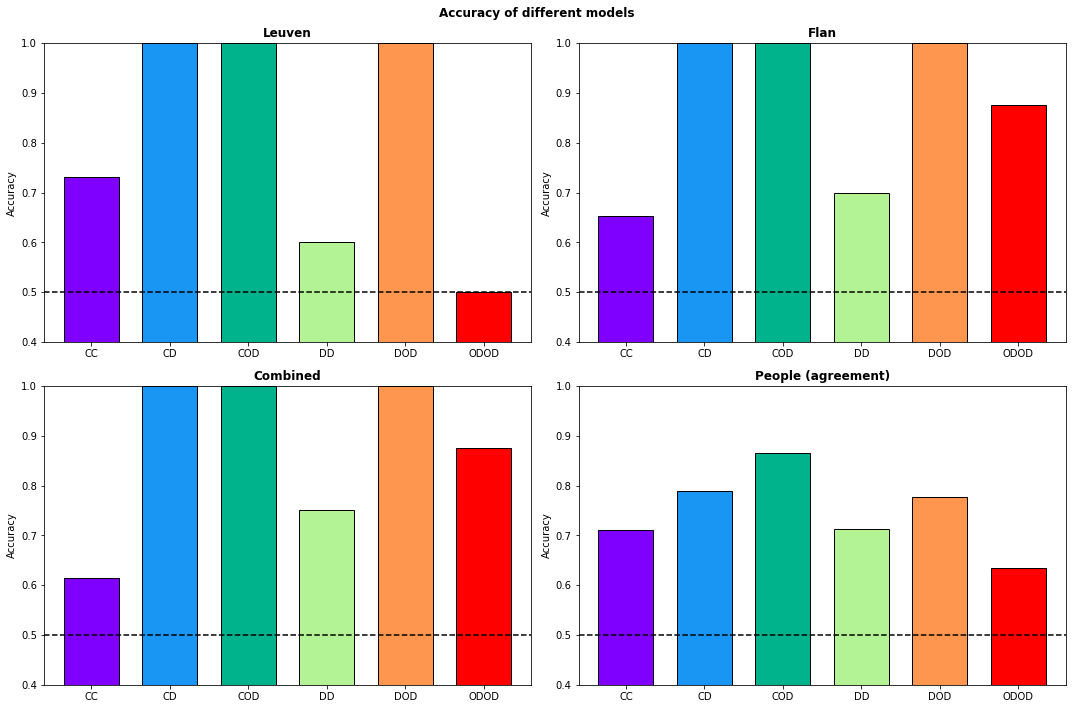

In [88]:
# # make a bar plot graph for each of the columns in df
# # the x-axis is the index of df and the y-axis is the value of the column
# # the title of the graph is the name of the column
# # color each of the bars in rainbow colors
# # set the size of the graph to be 10 inches by 10 inches
# # set the x-axis label to be 'Type of triplet'
# # set the y-axis label to be 'Accuracy'
# # let the y-axis range from 0 to 1
# # set the x-axis ticks to be the index of df
# # let the x-axis ticks be rotated by 90 degrees
# # set the legend to be on the top right of the graph
# # set the legend title to be 'Type of triplet'
# # do this for each of the columns in df
# for col in df.columns:
#     df[col].plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(df.index))), figsize=(10, 10))
#     plt.title(col)
#     plt.xlabel('Type of triplet')
#     plt.ylabel('Accuracy')
#     plt.ylim(0.4, 1)
#     plt.xticks(range(len(df.index)), df.index, rotation=0)
#     plt.show()

# make one graph and arrange the subplots in a 2 by 2 grid
# make the first subplot the graph for the column 'Leuven'
# make the second subplot the graph for the column 'Flan'
# make the third subplot the graph for the column 'Combined'
# make the fourth subplot the graph for the column 'People (agreement)'
# make the titles of the subplots bold

saturation = 1
brightness = 0.7

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# set the title of the graph to be 'Accuracy of different models
fig.suptitle('Accuracy of different models', fontweight='bold')
original_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.index)))
colors = [colorsys.rgb_to_hsv(color[0]*255, color[1]*255, color[2]*255) for color in original_colors]
colors = [colorsys.hsv_to_rgb(color[0], saturation, brightness) for color in colors]
colors[0] = original_colors[0]
colors[1] = original_colors[1]
colors[3] = original_colors[3]
colors[4] = original_colors[4]
colors[5] = original_colors[5]



# make the colors less bright and more saturated
# decrease the distamce between the bars
# remove the x axis label

df['Leuven'].plot(kind='bar', color=colors, ax=axes[0, 0],  width=0.7, edgecolor='black')
axes[0, 0].set_title('Leuven', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.4, 1)
axes[0, 0].set_xticks(range(len(df.index)))
axes[0, 0].set_xticklabels(df.index, rotation=0)
axes[0, 0].set_xlabel('')
# draw a dashed line at 0.5
axes[0, 0].axhline(y=0.5, color='black', linestyle='--')




df['Flan'].plot(kind='bar', color=colors, ax=axes[0, 1],  width=0.7, edgecolor='black')
axes[0, 1].set_title('Flan', fontweight='bold')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_ylim(0.4, 1)
axes[0, 1].set_xticks(range(len(df.index)))
axes[0, 1].set_xticklabels(df.index, rotation=0)
axes[0, 1].set_xlabel('')
axes[0, 1].axhline(y=0.5, color='black', linestyle='--')

df['Combined'].plot(kind='bar', color=colors, ax=axes[1, 0],  width=0.7, edgecolor='black')
axes[1, 0].set_title('Combined', fontweight='bold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0.4, 1)
axes[1, 0].set_xticks(range(len(df.index)))
axes[1, 0].set_xticklabels(df.index, rotation=0)
axes[1, 0].set_xlabel('')
axes[1, 0].axhline(y=0.5, color='black', linestyle='--')


df['People (agreement)'].plot(kind='bar', color=colors, ax=axes[1, 1],  width=0.7, edgecolor='black')
axes[1, 1].set_title('People (agreement)', fontweight='bold')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0.4, 1)
axes[1, 1].set_xticks(range(len(df.index)))
axes[1, 1].set_xticklabels(df.index, rotation=0)
# remove the x-axis label of the last subplot
axes[1, 1].set_xlabel('')
axes[1, 1].axhline(y=0.5, color='black', linestyle='--')

plt.tight_layout()
plt.show()
# save the graph as a pdf file
fig.savefig('../graphs/accuracy.pdf', bbox_inches='tight')


# d prime

In [588]:
tmp_df = pd.read_csv('../data/leuven/leuven_norms_original_counts.csv', index_col=0)

# print columns that are duplicated
print(tmp_df.columns[tmp_df.columns.duplicated()])

Index([], dtype='object')


In [590]:
import scipy.stats as stats
import copy
def preprocess_leuven_and_flan_to_calculate_dprime(leuven_norms_fpath ='../data/leuven/leuven_norms_original_counts.csv', flan_responses_fpath = '../data/leuven/flan_leuven_norms_with_spaces.csv', threshold = 3):
    flan_responses = pd.read_csv(flan_responses_fpath, index_col=0)
    leuven_norms = pd.read_csv(leuven_norms_fpath, index_col=0)
    # for all cells in leuven_norms_original_counts, if the value is greater than or equal to 3, set it to 1
    # otherwise, set it to 0. Do this for all columns except the first column
    for col in leuven_norms.columns[1:]:
        leuven_norms[col] = leuven_norms[col].apply(lambda x: 1 if int(x) >= threshold else 0)
    leuven_norms.rename(columns={'Unnamed: 0': 'concept'}, inplace=True)
    leuven_norms.set_index('concept', inplace=True)

    # sort the columns of leuven norms in alphabetical order
    leuven_norms = leuven_norms.reindex(sorted(leuven_norms.columns), axis=1)

    # sorth the rows of leuven norms in alphabetical order
    leuven_norms = leuven_norms.sort_index()

    # assert that the columns of leuven norms are the same as the columns of flan responses and that the rows are the same
    assert leuven_norms.columns.equals(flan_responses.columns)
    assert leuven_norms.index.equals(flan_responses.index)
    leuven_norms = leuven_norms.T
    flan_responses = flan_responses.T
    return leuven_norms, flan_responses

def calculate_dprime_hr_far(y_true, y_pred):
    # calculate the number of true positives, false positives, true negatives, and false negatives
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))

    # calculate the hit rate and false alarm rate
    hr = (tp + 0.5) / (tp + fn + 1)
    far = (fp + 0.5) / (fp + tn + 1)
    # calculate the dprime
    dprime = stats.norm.ppf(hr) - stats.norm.ppf(far)
    return dprime, hr, far

def combine_leuven_and_flan(leuven_norms, flan_responses):
    animals, artifacts, animal_features, artifact_features = get_animal_and_artifact_names_and_features()
    # make a new data frame called combined, use leuven norms and make all the cells NaN
    combined = copy.deepcopy(leuven_norms)
    combined[:] = np.nan
    # for all the columns in combined, if the column name is in animals, for all the features in animal_features, set the cell to the value in leuven norms
    # for all the features in artifact_features, set the cell to the value in flan responses
    for col in combined.columns:
        if col in animals:
            for feature in animal_features:
                combined.loc[feature, col] = leuven_norms.loc[feature, col]
            for feature in artifact_features:
                combined.loc[feature, col] = flan_responses.loc[feature, col]
        elif col in artifacts:
            for feature in artifact_features:
                combined.loc[feature, col] = leuven_norms.loc[feature, col]
            for feature in animal_features:
                combined.loc[feature, col] = flan_responses.loc[feature, col]
    return combined


def init_dprime_far_hr():
    dprime_animals = []
    dprime_artifacts = []
    dprime_combined = []
    hr_animals = []
    hr_artifacts = []
    hr_combined = []
    far_animals = []
    far_artifacts = []
    far_combined = []
    return dprime_animals, dprime_artifacts, dprime_combined, hr_animals, hr_artifacts, hr_combined, far_animals, far_artifacts, far_combined

def init_dprime_dfs():
    dprime_animals = pd.DataFrame(columns=['dprime', 'hr', 'far'])
    dprime_artifacts = pd.DataFrame(columns=['dprime', 'hr', 'far'])
    dprime_combined = pd.DataFrame(columns=['dprime', 'hr', 'far'])
    return dprime_animals, dprime_artifacts, dprime_combined

def calculate_dprime(flan_response_fpath):
    animals, artifacts, animal_features, artifact_features = get_animal_and_artifact_names_and_features()
    dprime_animals_df, dprime_artifacts_df, dprime_combined_df = init_dprime_dfs()
    for threshold in range(1, 5):
        leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=threshold, flan_responses_fpath=flan_response_fpath)
        dprime_animals, dprime_artifacts, dprime_combined, hr_animals, hr_artifacts, hr_combined, far_animals, far_artifacts, far_combined = init_dprime_far_hr()
        for col in leuven_norms.columns:
            dprime, hr, far = calculate_dprime_hr_far(leuven_norms[col], flan_responses[col])
            dprime_combined.append(dprime)
            hr_combined.append(hr)
            far_combined.append(far)
            if col in animals:
                #chose only those rows of leuven_norms and flan_responses that are in animal_features
                dprime, hr, far = calculate_dprime_hr_far(leuven_norms[col][animal_features], flan_responses[col][animal_features])
                dprime_animals.append(dprime)
                hr_animals.append(hr)
                far_animals.append(far)
            elif col in artifacts:
                dprime, hr, far = calculate_dprime_hr_far(leuven_norms[col][artifact_features], flan_responses[col][artifact_features])
                dprime_artifacts.append(dprime)
                hr_artifacts.append(hr)
                far_artifacts.append(far)
        dprime_animals_df.loc[threshold] = [np.mean(dprime_animals), np.mean(hr_animals), np.mean(far_animals)]
        dprime_artifacts_df.loc[threshold] = [np.mean(dprime_artifacts), np.mean(hr_artifacts), np.mean(far_artifacts)]
        dprime_combined_df.loc[threshold] = [np.mean(dprime_combined), np.mean(hr_combined), np.mean(far_combined)]
    return dprime_animals_df, dprime_artifacts_df, dprime_combined_df
        

def get_animal_and_artifact_names_and_features():
    leuven_animals = list(pd.read_csv('../data/leuven/animal_leuven_norms.csv', index_col=0).index)
    leuven_artifacts = list(pd.read_csv('../data/leuven/artifacts_leuven_norms.csv', index_col=0).index)
    leuven_features = pd.read_csv('../data/data_to_tim/leuven_features.csv', index_col=0)
    animal_features = leuven_features[leuven_features['dataset'] == 'animal_only']['feature'].values.tolist() + leuven_features[leuven_features['dataset'] == 'both']['feature'].values.tolist()
    artifact_features = leuven_features[leuven_features['dataset'] == 'artifacts_only']['feature'].values.tolist() +leuven_features[leuven_features['dataset'] == 'both']['feature'].values.tolist()
    return leuven_animals, leuven_artifacts, animal_features, artifact_features

## flan responses with underscore

In [572]:
dprime_animals, dprime_artifacts, dprime_combined = calculate_dprime(flan_response_fpath='../data/leuven/flan_leuven_norms_overlap.csv')

In [573]:
dprime_animals

,dprime,hr,far
1,0.975271,0.335843,0.086629
2,1.195465,0.444095,0.098232
3,1.328540,0.523606,0.110675
4,1.368995,0.565708,0.124397


In [574]:
dprime_artifacts

,dprime,hr,far
1,1.420563,0.326536,0.032580
2,1.543260,0.425779,0.044179
3,1.700460,0.521775,0.053429
4,1.844770,0.610898,0.065747


In [575]:
dprime_combined

,dprime,hr,far
1,1.357341,0.330606,0.038470
2,1.557105,0.433788,0.044960
3,1.728703,0.522576,0.050643
4,1.852572,0.591137,0.057664


## flan responses with spaces

In [583]:
dprime_animals, dprime_artifacts, dprime_combined = calculate_dprime(flan_response_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')

In [584]:
dprime_animals


,dprime,hr,far
1,1.108714,0.478185,0.129145
2,1.275031,0.584570,0.152259
3,1.431961,0.667448,0.169484
4,1.476010,0.702131,0.186712


In [585]:
dprime_artifacts

,dprime,hr,far
1,1.661732,0.509393,0.053499
2,1.845101,0.643549,0.073301
3,2.055364,0.748074,0.089241
4,2.204514,0.813157,0.107932


In [586]:
#convert dprime to latex table
def dprime_to_latex_table(dprime_animals, dprime_artifacts, dprime_combined):

    dprime_animals = dprime_animals.round(2)
    dprime_artifacts = dprime_artifacts.round(2)
    dprime_combined = dprime_combined.round(2)

    dprime_animals = dprime_animals.rename(columns={'dprime': 'dprime_animals', 'hr': 'hr_animals', 'far': 'far_animals'})
    dprime_artifacts = dprime_artifacts.rename(columns={'dprime': 'dprime_artifacts', 'hr': 'hr_artifacts', 'far': 'far_artifacts'})
    dprime_combined = dprime_combined.rename(columns={'dprime': 'dprime_combined', 'hr': 'hr_combined', 'far': 'far_combined'})

    dprime_animals = dprime_animals.reset_index().rename(columns={'index': 'threshold'})
    dprime_artifacts = dprime_artifacts.reset_index().rename(columns={'index': 'threshold'})
    dprime_combined = dprime_combined.reset_index().rename(columns={'index': 'threshold'})

    dprime_animals['threshold'] = dprime_animals['threshold'].astype(str)
    dprime_artifacts['threshold'] = dprime_artifacts['threshold'].astype(str)
    dprime_combined['threshold'] = dprime_combined['threshold'].astype(str)

    dprime_animals = dprime_animals.set_index('threshold')
    dprime_artifacts = dprime_artifacts.set_index('threshold')
    dprime_combined = dprime_combined.set_index('threshold')

    dprime_animals = dprime_animals[['dprime_animals', 'hr_animals', 'far_animals']]
    dprime_artifacts = dprime_artifacts[['dprime_artifacts', 'hr_artifacts', 'far_artifacts']]
    dprime_combined = dprime_combined[['dprime_combined', 'hr_combined', 'far_combined']]

    dprime_animals = dprime_animals.to_latex()
    dprime_artifacts = dprime_artifacts.to_latex()
    dprime_combined = dprime_combined.to_latex()

    print(dprime_animals)
    print(dprime_artifacts)
    print(dprime_combined)

dprime_to_latex_table(dprime_animals, dprime_artifacts, dprime_combined)

\begin{tabular}{lrrr}
\toprule
{} &  dprime\_animals &  hr\_animals &  far\_animals \\
threshold &                 &             &              \\
\midrule
1         &            1.11 &        0.48 &         0.13 \\
2         &            1.28 &        0.58 &         0.15 \\
3         &            1.43 &        0.67 &         0.17 \\
4         &            1.48 &        0.70 &         0.19 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  dprime\_artifacts &  hr\_artifacts &  far\_artifacts \\
threshold &                   &               &                \\
\midrule
1         &              1.66 &          0.51 &           0.05 \\
2         &              1.85 &          0.64 &           0.07 \\
3         &              2.06 &          0.75 &           0.09 \\
4         &              2.20 &          0.81 &           0.11 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  dprime\_combined &  hr\_combined &  far\_combined \\
threshold &                 

/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/3812643172.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dprime_animals = dprime_animals.to_latex()
/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/3812643172.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  dprime_artifacts = dprime_artifacts.to_latex()
/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/3812643172.py:30: FutureWarning: In future versions `DataFrame.to

In [571]:
dprime_combined

,dprime,hr,far
1,1.525210,0.495746,0.065410
2,1.756034,0.617758,0.076608
3,1.973932,0.712817,0.085559
4,2.105179,0.764607,0.095573


# computing performance of on triplets

In [672]:
from sklearn.metrics.pairwise import cosine_similarity

def cleanup_concept_name(head, o1, o2):
    head = ''.join(head.split(' '))
    o1 = ''.join(o1.split(' '))
    o2 = ''.join(o2.split(' '))
    # if head or o1 or o2 is 'flea' replace it with 'flee'
    if head == 'flea':
        head = 'flee'
    if o1 == 'flea':
        o1 = 'flee'
    if o2 == 'flea':
        o2 = 'flee'
    # if head or o1 or o2 is 'northern_pike' replace it with 'pike'
    if head == 'northernpike':
        head = 'pike'
    if o1 == 'northernpike':
        o1 = 'pike'
    if o2 == 'northernpike':
        o2 = 'pike'
    # if head or o1 or o2 is 'canopener' replace it with 'can_opener'
    if head == 'canopener':
        head = 'can_opener'
    if o1 == 'canopener':
        o1 = 'can_opener'
    if o2 == 'canopener':
        o2 = 'can_opener'
    # if head or o1 or o2 is 'brownbat' replace it with 'bat'
    if head == 'brownbat':
        head = 'bat'
    if o1 == 'brownbat':
        o1 = 'bat'
    if o2 == 'brownbat':
        o2 = 'bat'
    # if head or o1 or o2 is 'polarbear' replace it with 'polar_bear'
    if head == 'polarbear':
        head = 'polar_bear'
    if o1 == 'polarbear':
        o1 = 'polar_bear'
    if o2 == 'polarbear':
        o2 = 'polar_bear'
    # if head or o1 or o2 is 'puttyknife' replace it with 'knife'
    if head == 'puttyknife':
        head = 'knife'
    if o1 == 'puttyknife':
        o1 = 'knife'
    if o2 == 'puttyknife':
        o2 = 'knife'
    # if head or o1 or o2 is 'electrickettle' replace it with 'electric_kettle'
    if head == 'electrickettle':
        head = 'electric_kettle'
    if o1 == 'electrickettle':
        o1 = 'electric_kettle'
    if o2 == 'electrickettle':
        o2 = 'electric_kettle'
    # if head or o1 or o2 is 'mo-ped' replace it with 'moped'
    if head == 'mo-ped':
        head = 'moped'
    if o1 == 'mo-ped':
        o1 = 'moped'
    if o2 == 'mo-ped':
        o2 = 'moped'
    # if head or o1 or o2 is 'placemat' replace it with 'place_mat'
    if head == 'placemat':
        head = 'place_mat'
    if o1 == 'placemat':
        o1 = 'place_mat'
    if o2 == 'placemat':
        o2 = 'place_mat'
     # if head or o1 or o2 is 'drumset' replace it with 'drum_set'
    if head == 'drumset':
        head = 'drum_set'
    if o1 == 'drumset':
        o1 = 'drum_set'
    if o2 == 'drumset':
        o2 = 'drum_set'
    # if head or o1 or o2 is 'dishtowel' replace it with 'towel'
    if head == 'dishtowel':
        head = 'towel'
    if o1 == 'dishtowel':
        o1 = 'towel'
    if o2 == 'dishtowel':
        o2 = 'towel'
    # if head or o1 or o2 is 'bassguitar' replace it with 'bass_guitar'
    if head == 'bassguitar':
        head = 'bass_guitar'
    if o1 == 'bassguitar':
        o1 = 'bass_guitar'
    if o2 == 'bassguitar':
        o2 = 'bass_guitar'
    # if head or o1 or o2 is 'boaconstrictor' replace it with 'boa'
    if head == 'boaconstrictor':
        head = 'boa'
    if o1 == 'boaconstrictor':
        o1 = 'boa'
    if o2 == 'boaconstrictor':
        o2 = 'boa'
    # if head or o1 or o2 is 'bee' replace it with 'bee_'
    if head == 'bee':
        head = 'bee_'
    if o1 == 'bee':
        o1 = 'bee_'
    if o2 == 'bee':
        o2 = 'bee_'
    # if head or o1 or o2 is 'cannon' replace it with 'canon'
    if head == 'cannon':
        head = 'canon'
    if o1 == 'cannon':
        o1 = 'canon'
    if o2 == 'cannon':
        o2 = 'canon'
    # if head or o1 or o2 is 'scissors' replace it with 'scissor'
    if head == 'scissors':
        head = 'scissor'
    if o1 == 'scissors':
        o1 = 'scissor'
    if o2 == 'scissors':
        o2 = 'scissor'
    # if head or o1 or o2 is 'woodsaw' replace it with 'say'
    if head == 'woodsaw':
        head = 'saw'
    if o1 == 'woodsaw':
        o1 = 'saw'
    if o2 == 'woodsaw':
        o2 = 'saw'
    # if head or o1 or o2 is 'armytank' replace it with 'tank'
    if head == 'armytank':
        head = 'tank'
    if o1 == 'armytank':
        o1 = 'tank'
    if o2 == 'armytank':
        o2 = 'tank'
    # if head or o1 or o2 is 'wirebrush' replace it with 'wirebrush'
    if head == 'wirebrush':
        head = 'wire_brush'
    if o1 == 'wirebrush':
        o1 = 'wire_brush'
    if o2 == 'wirebrush':
        o2 = 'wire_brush'
    # if head or o1 or o2 is 'spermwhale' replace it with 'sperm_whale'
    if head == 'spermwhale':
        head = 'sperm_whale'
    if o1 == 'spermwhale':
        o1 = 'sperm_whale'
    if o2 == 'spermwhale':
        o2 = 'sperm_whale'
    # if head or o1 or o2 is 'vacuum' replace it with 'vacuum_cleaner'
    if head == 'vacuum':
        head = 'vacuum_cleaner'
    if o1 == 'vacuum':
        o1 = 'vacuum_cleaner'
    if o2 == 'vacuum':
        o2 = 'vacuum_cleaner'
    # if head or o1 or o2 is 'bathingsuit' replace it with 'bathing_suit'
    if head == 'bathingsuit':
        head = 'bathing_suit'
    if o1 == 'bathingsuit':
        o1 = 'bathing_suit'
    if o2 == 'bathingsuit':
        o2 = 'bathing_suit'
    # if head or o1 or o2 is 'hotairbaloon' replace it with 'hot_air_baloon'
    if head == 'hotairballoon':
        head = 'hot_air_balloon'
    if o1 == 'hotairballoon':
        o1 = 'hot_air_balloon'
    if o2 == 'hotairballoon':
        o2 = 'hot_air_balloon'
    return head, o1, o2

def determine_winner(head, o1, o2, distance_matrix):
    distance_matrix.index = distance_matrix.index.str.lower()
    head, o1, o2 = cleanup_concept_name(head, o1, o2)
    # deteermine if the head, o1, and o2 are in the distance matrix
    if head in distance_matrix.index and o1 in distance_matrix.index and o2 in distance_matrix.index:
        # get the distance between the head and o1
        head_o1_distance = distance_matrix.loc[head, o1]
        # get the distance between the head and o2
        head_o2_distance = distance_matrix.loc[head, o2]
        # if the distance between the head and o1 is less than the distance between the head and o2, then o1 is the winner
        if head_o1_distance < head_o2_distance:
            return o1
        # if the distance between the head and o2 is less than the distance between the head and o1, then o2 is the winner
        elif head_o2_distance < head_o1_distance:
            return o2
        # if the distance between the head and o1 is the same as the distance between the head and o2, then the winner is random
        else:
            return 'same'
    # else:
    #     unpresent=[]
    #     if head not in distance_matrix.index:
    #         unpresent.append(head)
    #     if o1 not in distance_matrix.index:
    #         unpresent.append(o1)
    #     if o2 not in distance_matrix.index:
    #         unpresent.append(o2)
    #     print('not in distance matrix: ' + ', '.join(unpresent))

## new flan responses and leuven norms threshold 4 on updated triplets

In [698]:
leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=4, flan_responses_fpath='../data/leuven/flan_leuven_norms_with_spaces.csv')
combined = combine_leuven_and_flan(leuven_norms, flan_responses)
triplet_data = pd.read_csv('../results/leuven_triplets_meanagree.csv', index_col=0)

# calculate cosine distance matrix between all pairs of stimuli in leuven_norms
# set the names of the stimuli as the index of the dataframe
leuven_cosine_dist = 1 - pd.DataFrame(cosine_similarity(leuven_norms.T), index=leuven_norms.columns, columns=leuven_norms.columns)
flan_cosine_dist = 1 - pd.DataFrame(cosine_similarity(flan_responses.T), index=flan_responses.columns, columns=flan_responses.columns)
combined_cosine_dist = 1 - pd.DataFrame(cosine_similarity(combined.T), index=combined.columns, columns=combined.columns)

In [699]:
winners = []
for i, row in triplet_data.iterrows():
    head, o1, o2 = row['head'], row['O1'], row['O2']
    triplet_data.loc[i, 'leuven_4_winner'] = determine_winner(head, o1, o2, leuven_cosine_dist)
    triplet_data.loc[i, 'flan_no_spaces_winner'] = determine_winner(head, o1, o2, flan_cosine_dist)
    triplet_data.loc[i, 'combined_winner'] = determine_winner(head, o1, o2, combined_cosine_dist)
    triplet_data.loc[i, 'Winner'] = cleanup_concept_name(row['Winner'], row['Winner'], row['Winner'])[0]
    # winners.append(determine_winner(head, o1, o2, leuven_cosine_dist))
    # winners.append(determine_winner(head, o1, o2, flan_cosine_dist))

# pick columns wehere leuven_4_winner is not None
df = triplet_data[triplet_data['leuven_4_winner'].notnull()]
# pick columns where flan is not Nan
# df = df[df['lfv3'].notnull()]
# data = df

# for everything in 'leuven_4_winner', if it is 'same' then chose winner randomly from 'O1' and 'O2'
df.loc[:, 'leuven_4_winner'] = df.apply(lambda row: random.choice([row['O1'], row['O2']]) if row['leuven_4_winner'] == 'same' else row['leuven_4_winner'], axis=1)

# Make a column leuven_4_accuracy that is 1 if leuven_4_winner is the same as the 'Winner' column and 0 otherwise
df.loc[:, 'leuven_4_accuracy'] = df.apply(lambda row: 1 if row['leuven_4_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'flan_no_spaces_accuracy'] = df.apply(lambda row: 1 if row['flan_no_spaces_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'combined_accuracy'] = df.apply(lambda row: 1 if row['combined_winner'] == row['Winner'] else 0, axis=1)

data = df
# make a column that shows the number of times a certain ttype was presented
df.loc[:, 'ttype_count'] = df.groupby('ttype')['ttype'].transform('count')
# aggregate rows by the column 'ttype'
df = df.groupby('ttype').mean()

# keep the columns leuven_4_accuracy, flan_no_spaces_accuracy, and ttype_count
df = df[['leuven_4_accuracy', 'flan_no_spaces_accuracy', 'combined_accuracy', 'pMaj','ttype_count']]

/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/2524337447.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'leuven_4_winner'] = df.apply(lambda row: random.choice([row['O1'], row['O2']]) if row['leuven_4_winner'] == 'same' else row['leuven_4_winner'], axis=1)
/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/2524337447.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'leuven_4_accuracy'] = df.apply(lambda row: 1 if row['leuven_4_winner'] == row['W

In [700]:
# from data show rows where ttype is 'ODOD' and show columns ['head', 'O1', 'O2','Winner', 'leuven_4_winner']
data[(data['ttype'] == 'ODOD')][['head', 'O1', 'O2','Winner', 'leuven_4_winner', 'lfv3','flan', 'flan_no_spaces_winner', 'flan_no_spaces_accuracy', 'pMaj']]

,head,O1,O2,Winner,leuven_4_winner,lfv3,flan,flan_no_spaces_winner,flan_no_spaces_accuracy,pMaj
6,cockroach,harp,screwdriver,screwdriver,screwdriver,screwdriver,screwdriver,screwdriver,1,0.567568
12,piranha,boat,jar,boat,boat,jar,jar,boat,1,0.837838
72,pistol,flea,moth,flee,flea,NaN,NaN,flee,1,0.555556
78,mo-ped,beetle,robin,robin,robin,NaN,NaN,beetle,0,0.540541
108,cow,blouse,mo-ped,moped,mo-ped,NaN,NaN,moped,1,0.621622
126,wood saw,polar bear,whale,polar_bear,whale,NaN,NaN,whale,0,0.675676
138,harpsichord,blackbird,earwig,blackbird,earwig,earwig,blackbird,blackbird,1,0.621622
144,pyjamas,chameleon,falcon,chameleon,chameleon,falcon,chameleon,chameleon,1,0.513514
150,whip,lion,zebra,lion,zebra,lion,lion,lion,1,0.756757
174,tortoise,fridge,harpsichord,harpsichord,harpsichord,harpsichord,harpsichord,fridge,0,0.513514


In [704]:
df['leuven_4_accuracy']['ODOD'] = 0.5

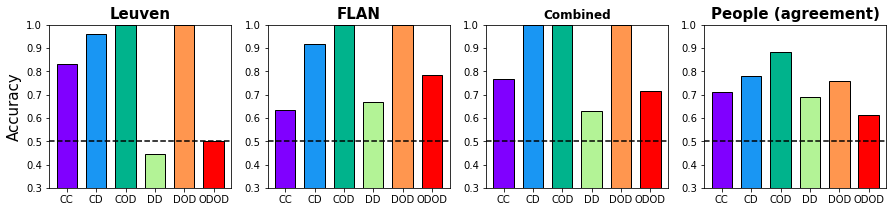

In [790]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
# set the title of the graph to be 'Accuracy of different models
# fig.suptitle('Accuracy of predictions from different models', fontweight='bold', fontsize=20)
original_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.index)))
colors = [colorsys.rgb_to_hsv(color[0]*255, color[1]*255, color[2]*255) for color in original_colors]
colors = [colorsys.hsv_to_rgb(color[0], saturation, brightness) for color in colors]
colors[0] = original_colors[0]
colors[1] = original_colors[1]
colors[3] = original_colors[3]
colors[4] = original_colors[4]
colors[5] = original_colors[5]



# make the colors less bright and more saturated
# decrease the distamce between the bars
# remove the x axis label

df['leuven_4_accuracy'].plot(kind='bar', color=colors, ax=axes[0],  width=0.7, edgecolor='black')
axes[0].set_title('Leuven', fontweight='bold', fontsize=15)
axes[0].set_ylabel('Accuracy', fontsize=15)
axes[0].set_ylim(0.3, 1)
axes[0].set_xticks(range(len(df.index)))
axes[0].set_xticklabels(df.index, rotation=0)
axes[0].set_xlabel('')
# draw a dashed line at 0.5
axes[0].axhline(y=0.5, color='black', linestyle='--')

df['flan_no_spaces_accuracy'].plot(kind='bar', color=colors, ax=axes[1], width=0.7, edgecolor='black')
axes[1].set_title('FLAN', fontweight='bold', fontsize=15)
# axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.3, 1)
axes[1].set_xticks(range(len(df.index)))
axes[1].set_xticklabels(df.index, rotation=0)
axes[1].set_xlabel('')
# draw a dashed line at 0.5
axes[1].axhline(y=0.5, color='black', linestyle='--')

df['combined_accuracy'].plot(kind='bar', color=colors, ax=axes[2], width=0.7, edgecolor='black')
axes[2].set_title('Combined', fontweight='bold', fontsize=12)
# axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.3, 1)
axes[2].set_xticks(range(len(df.index)))
axes[2].set_xticklabels(df.index, rotation=0)
axes[2].set_xlabel('')
# draw a dashed line at 0.5
axes[2].axhline(y=0.5, color='black', linestyle='--')

df['pMaj'].plot(kind='bar', color=colors, ax=axes[3],  width=0.7, edgecolor='black')
axes[3].set_title('People (agreement)', fontweight='bold', fontsize=15)
# axes[3].set_ylabel('Accuracy')
axes[3].set_ylim(0.3, 1)
axes[3].set_xticks(range(len(df.index)))
axes[3].set_xticklabels(df.index, rotation=0)
# remove the x-axis label of the last subplot
axes[3].set_xlabel('')
axes[3].axhline(y=0.5, color='black', linestyle='--')


plt.show()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig.savefig('../graphs/accuracy.pdf', bbox_inches='tight', transparent=True)


In [783]:
(df['flan_no_spaces_accuracy']['DD'] - df['leuven_4_accuracy']['DD'])/df['leuven_4_accuracy']['DD'], (df['flan_no_spaces_accuracy']['ODOD'] - df['leuven_4_accuracy']['ODOD'])/df['leuven_4_accuracy']['ODOD']

(0.5, 0.5714285714285714)

In [785]:
# find the average accuracy of the models
df.mean()

leuven_4_accuracy           0.789352
flan_no_spaces_accuracy     0.833730
combined_accuracy           0.851764
pMaj                        0.738836
ttype_count                22.000000
dtype: float64

In [787]:
0.851764 - 0.789352

0.06241199999999991

## old flan responses and leuven norms threshold 3 on updated triplets

/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/3837677507.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'leuven_4_winner'] = df.apply(lambda row: random.choice([row['O1'], row['O2']]) if row['leuven_4_winner'] == 'same' else row['leuven_4_winner'], axis=1)
/var/folders/qt/rt9bv7zs62b05gjym3zzqgyw0000gn/T/ipykernel_52130/3837677507.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'leuven_4_accuracy'] = df.apply(lambda row: 1 if row['leuven_4_winner'] == row['W

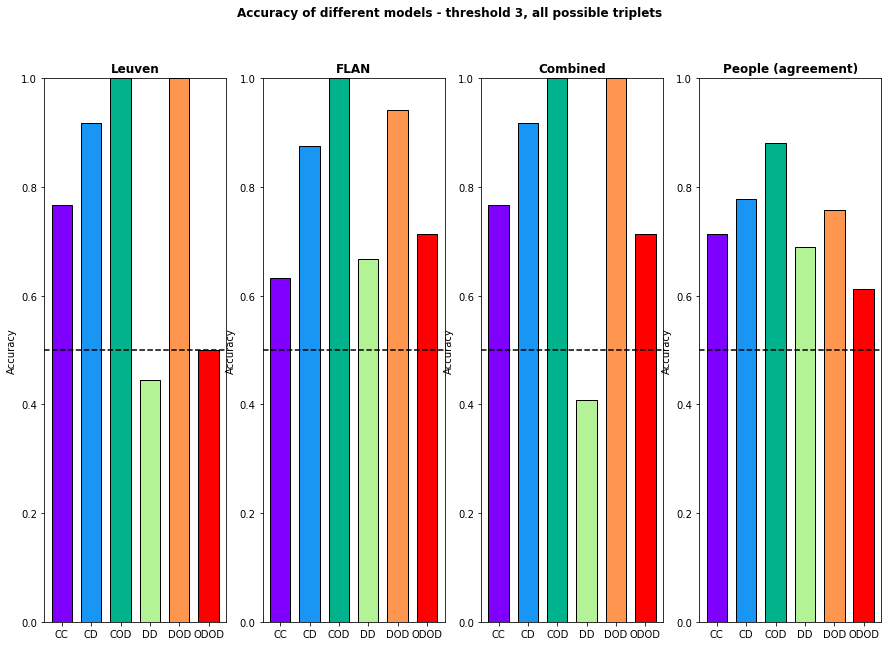

In [665]:
leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=3, flan_responses_fpath='../data/leuven/flan_leuven_norms_overlap.csv')
combined = combine_leuven_and_flan(leuven_norms, flan_responses)
triplet_data = pd.read_csv('../results/leuven_triplets_meanagree.csv', index_col=0)

# calculate cosine distance matrix between all pairs of stimuli in leuven_norms
# set the names of the stimuli as the index of the dataframe
leuven_cosine_dist = 1 - pd.DataFrame(cosine_similarity(leuven_norms.T), index=leuven_norms.columns, columns=leuven_norms.columns)
flan_cosine_dist = 1 - pd.DataFrame(cosine_similarity(flan_responses.T), index=flan_responses.columns, columns=flan_responses.columns)
combined_cosine_dist = 1 - pd.DataFrame(cosine_similarity(combined.T), index=combined.columns, columns=combined.columns)
winners = []
for i, row in triplet_data.iterrows():
    head, o1, o2 = row['head'], row['O1'], row['O2']
    triplet_data.loc[i, 'leuven_4_winner'] = determine_winner(head, o1, o2, leuven_cosine_dist)
    triplet_data.loc[i, 'flan_no_spaces_winner'] = determine_winner(head, o1, o2, flan_cosine_dist)
    triplet_data.loc[i, 'combined_winner'] = determine_winner(head, o1, o2, combined_cosine_dist)
    triplet_data.loc[i, 'Winner'] = cleanup_concept_name(row['Winner'], row['Winner'], row['Winner'])[0]
    # winners.append(determine_winner(head, o1, o2, leuven_cosine_dist))
    # winners.append(determine_winner(head, o1, o2, flan_cosine_dist))

# pick columns wehere leuven_4_winner is not None
df = triplet_data[triplet_data['leuven_4_winner'].notnull()]
# pick columns where flan is not Nan
# df = df[df['lfv3'].notnull()]
# data = df

# for everything in 'leuven_4_winner', if it is 'same' then chose winner randomly from 'O1' and 'O2'
df.loc[:, 'leuven_4_winner'] = df.apply(lambda row: random.choice([row['O1'], row['O2']]) if row['leuven_4_winner'] == 'same' else row['leuven_4_winner'], axis=1)

# Make a column leuven_4_accuracy that is 1 if leuven_4_winner is the same as the 'Winner' column and 0 otherwise
df.loc[:, 'leuven_4_accuracy'] = df.apply(lambda row: 1 if row['leuven_4_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'flan_no_spaces_accuracy'] = df.apply(lambda row: 1 if row['flan_no_spaces_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'combined_accuracy'] = df.apply(lambda row: 1 if row['combined_winner'] == row['Winner'] else 0, axis=1)

data = df
# make a column that shows the number of times a certain ttype was presented
df.loc[:, 'ttype_count'] = df.groupby('ttype')['ttype'].transform('count')
# aggregate rows by the column 'ttype'
df = df.groupby('ttype').mean()

# keep the columns leuven_4_accuracy, flan_no_spaces_accuracy, and ttype_count
df = df[['leuven_4_accuracy', 'flan_no_spaces_accuracy', 'combined_accuracy', 'pMaj','ttype_count']]
# from data show rows where ttype is 'ODOD' and show columns ['head', 'O1', 'O2','Winner', 'leuven_4_winner']
data[(data['ttype'] == 'ODOD')][['head', 'O1', 'O2','Winner', 'leuven_4_winner', 'lfv3','flan', 'flan_no_spaces_winner', 'flan_no_spaces_accuracy']]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
# set the title of the graph to be 'Accuracy of different models
fig.suptitle('Accuracy of different models - threshold 3, all possible triplets', fontweight='bold')
original_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.index)))
colors = [colorsys.rgb_to_hsv(color[0]*255, color[1]*255, color[2]*255) for color in original_colors]
colors = [colorsys.hsv_to_rgb(color[0], saturation, brightness) for color in colors]
colors[0] = original_colors[0]
colors[1] = original_colors[1]
colors[3] = original_colors[3]
colors[4] = original_colors[4]
colors[5] = original_colors[5]



# make the colors less bright and more saturated
# decrease the distamce between the bars
# remove the x axis label

df['leuven_4_accuracy'].plot(kind='bar', color=colors, ax=axes[0],  width=0.7, edgecolor='black')
axes[0].set_title('Leuven', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].set_xticks(range(len(df.index)))
axes[0].set_xticklabels(df.index, rotation=0)
axes[0].set_xlabel('')
# draw a dashed line at 0.5
axes[0].axhline(y=0.5, color='black', linestyle='--')

df['flan_no_spaces_accuracy'].plot(kind='bar', color=colors, ax=axes[1], width=0.7, edgecolor='black')
axes[1].set_title('FLAN', fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
axes[1].set_xticks(range(len(df.index)))
axes[1].set_xticklabels(df.index, rotation=0)
axes[1].set_xlabel('')
# draw a dashed line at 0.5
axes[1].axhline(y=0.5, color='black', linestyle='--')

df['combined_accuracy'].plot(kind='bar', color=colors, ax=axes[2], width=0.7, edgecolor='black')
axes[2].set_title('Combined', fontweight='bold')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0, 1)
axes[2].set_xticks(range(len(df.index)))
axes[2].set_xticklabels(df.index, rotation=0)
axes[2].set_xlabel('')
# draw a dashed line at 0.5
axes[2].axhline(y=0.5, color='black', linestyle='--')

df['pMaj'].plot(kind='bar', color=colors, ax=axes[3],  width=0.7, edgecolor='black')
axes[3].set_title('People (agreement)', fontweight='bold')
axes[3].set_ylabel('Accuracy')
axes[3].set_ylim(0, 1)
axes[3].set_xticks(range(len(df.index)))
axes[3].set_xticklabels(df.index, rotation=0)
# remove the x-axis label of the last subplot
axes[3].set_xlabel('')
axes[3].axhline(y=0.5, color='black', linestyle='--')


plt.show()



## old flan responses and leuven norms threshold 3 on subset of triplets - replicating tim's analysis

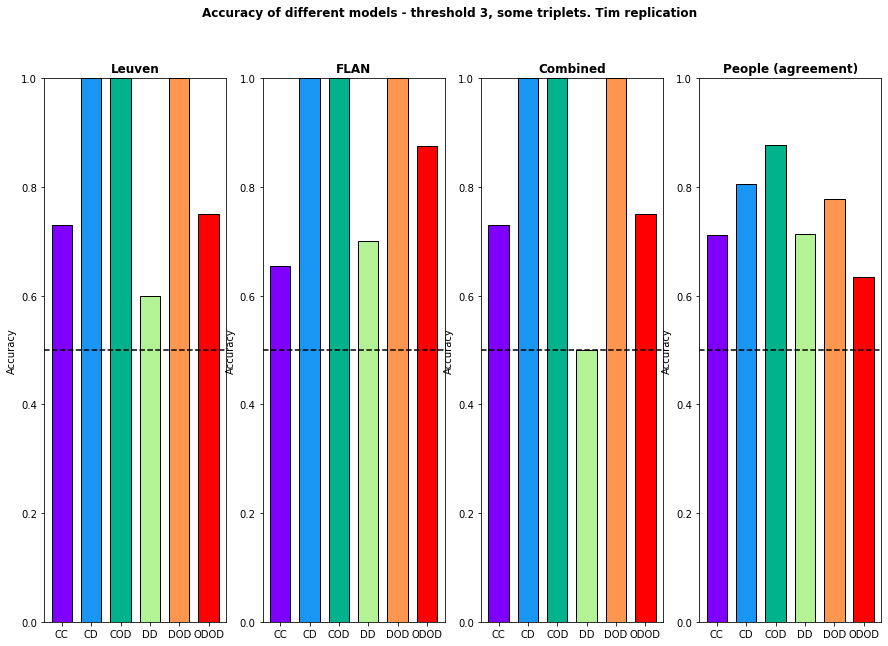

In [696]:
leuven_norms, flan_responses = preprocess_leuven_and_flan_to_calculate_dprime(threshold=3, flan_responses_fpath='../data/leuven/flan_leuven_norms_overlap.csv')
combined = combine_leuven_and_flan(leuven_norms, flan_responses)
triplet_data = pd.read_csv('../results/leuven_triplets_meanagree.csv', index_col=0)

# calculate cosine distance matrix between all pairs of stimuli in leuven_norms
# set the names of the stimuli as the index of the dataframe
leuven_cosine_dist = 1 - pd.DataFrame(cosine_similarity(leuven_norms.T), index=leuven_norms.columns, columns=leuven_norms.columns)
flan_cosine_dist = 1 - pd.DataFrame(cosine_similarity(flan_responses.T), index=flan_responses.columns, columns=flan_responses.columns)
combined_cosine_dist = 1 - pd.DataFrame(cosine_similarity(combined.T), index=combined.columns, columns=combined.columns)
winners = []
for i, row in triplet_data.iterrows():
    head, o1, o2 = row['head'], row['O1'], row['O2']
    triplet_data.loc[i, 'leuven_4_winner'] = determine_winner(head, o1, o2, leuven_cosine_dist)
    triplet_data.loc[i, 'flan_no_spaces_winner'] = determine_winner(head, o1, o2, flan_cosine_dist)
    triplet_data.loc[i, 'combined_winner'] = determine_winner(head, o1, o2, combined_cosine_dist)
    triplet_data.loc[i, 'Winner'] = cleanup_concept_name(row['Winner'], row['Winner'], row['Winner'])[0]
    # winners.append(determine_winner(head, o1, o2, leuven_cosine_dist))
    # winners.append(determine_winner(head, o1, o2, flan_cosine_dist))

# pick columns wehere leuven_4_winner is not None
df = triplet_data[triplet_data['leuven_4_winner'].notnull()]
# pick columns where flan is not Nan
df = df[df['lfv3'].notnull()]
# data = df

# for everything in 'leuven_4_winner', if it is 'same' then chose winner randomly from 'O1' and 'O2'
df.loc[:, 'leuven_4_winner'] = df.apply(lambda row: random.choice([row['O1'], row['O2']]) if row['leuven_4_winner'] == 'same' else row['leuven_4_winner'], axis=1)

# Make a column leuven_4_accuracy that is 1 if leuven_4_winner is the same as the 'Winner' column and 0 otherwise
df.loc[:, 'leuven_4_accuracy'] = df.apply(lambda row: 1 if row['leuven_4_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'flan_no_spaces_accuracy'] = df.apply(lambda row: 1 if row['flan_no_spaces_winner'] == row['Winner'] else 0, axis=1)
df.loc[:, 'combined_accuracy'] = df.apply(lambda row: 1 if row['combined_winner'] == row['Winner'] else 0, axis=1)

data = df
# make a column that shows the number of times a certain ttype was presented
df.loc[:, 'ttype_count'] = df.groupby('ttype')['ttype'].transform('count')
# aggregate rows by the column 'ttype'
df = df.groupby('ttype').mean()

# keep the columns leuven_4_accuracy, flan_no_spaces_accuracy, and ttype_count
df = df[['leuven_4_accuracy', 'flan_no_spaces_accuracy', 'combined_accuracy', 'pMaj','ttype_count']]
# from data show rows where ttype is 'ODOD' and show columns ['head', 'O1', 'O2','Winner', 'leuven_4_winner']
data[(data['ttype'] == 'ODOD')][['head', 'O1', 'O2','Winner', 'leuven_4_winner', 'lfv3','flan', 'flan_no_spaces_winner', 'flan_no_spaces_accuracy']]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
# set the title of the graph to be 'Accuracy of different models
fig.suptitle('Accuracy of different models - threshold 3, some triplets. Tim replication', fontweight='bold')
original_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.index)))
colors = [colorsys.rgb_to_hsv(color[0]*255, color[1]*255, color[2]*255) for color in original_colors]
colors = [colorsys.hsv_to_rgb(color[0], saturation, brightness) for color in colors]
colors[0] = original_colors[0]
colors[1] = original_colors[1]
colors[3] = original_colors[3]
colors[4] = original_colors[4]
colors[5] = original_colors[5]



# make the colors less bright and more saturated
# decrease the distamce between the bars
# remove the x axis label

df['leuven_4_accuracy'].plot(kind='bar', color=colors, ax=axes[0],  width=0.7, edgecolor='black')
axes[0].set_title('Leuven', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].set_xticks(range(len(df.index)))
axes[0].set_xticklabels(df.index, rotation=0)
axes[0].set_xlabel('')
# draw a dashed line at 0.5
axes[0].axhline(y=0.5, color='black', linestyle='--')

df['flan_no_spaces_accuracy'].plot(kind='bar', color=colors, ax=axes[1], width=0.7, edgecolor='black')
axes[1].set_title('FLAN', fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0, 1)
axes[1].set_xticks(range(len(df.index)))
axes[1].set_xticklabels(df.index, rotation=0)
axes[1].set_xlabel('')
# draw a dashed line at 0.5
axes[1].axhline(y=0.5, color='black', linestyle='--')

df['combined_accuracy'].plot(kind='bar', color=colors, ax=axes[2], width=0.7, edgecolor='black')
axes[2].set_title('Combined', fontweight='bold')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0, 1)
axes[2].set_xticks(range(len(df.index)))
axes[2].set_xticklabels(df.index, rotation=0)
axes[2].set_xlabel('')
# draw a dashed line at 0.5
axes[2].axhline(y=0.5, color='black', linestyle='--')

df['pMaj'].plot(kind='bar', color=colors, ax=axes[3],  width=0.7, edgecolor='black')
axes[3].set_title('People (agreement)', fontweight='bold')
axes[3].set_ylabel('Accuracy')
axes[3].set_ylim(0, 1)
axes[3].set_xticks(range(len(df.index)))
axes[3].set_xticklabels(df.index, rotation=0)
# remove the x-axis label of the last subplot
axes[3].set_xlabel('')
axes[3].axhline(y=0.5, color='black', linestyle='--')


plt.show()



In [697]:
df

,leuven_4_accuracy,flan_no_spaces_accuracy,combined_accuracy,pMaj,ttype_count
ttype,,,,,
CC,0.730769,0.653846,0.730769,0.710903,26.0
CD,1.000000,1.000000,1.000000,0.805180,10.0
COD,1.000000,1.000000,1.000000,0.877306,14.0
DD,0.600000,0.700000,0.500000,0.713176,20.0
DOD,1.000000,1.000000,1.000000,0.777662,13.0
ODOD,0.750000,0.875000,0.750000,0.634982,8.0
